<a href="https://colab.research.google.com/github/kunalpohakar/TensorFlow_Developer_Certificate_Bootcamp/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Networks in Tensorflow**

There are many definations for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other variable, even shorter.......predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model



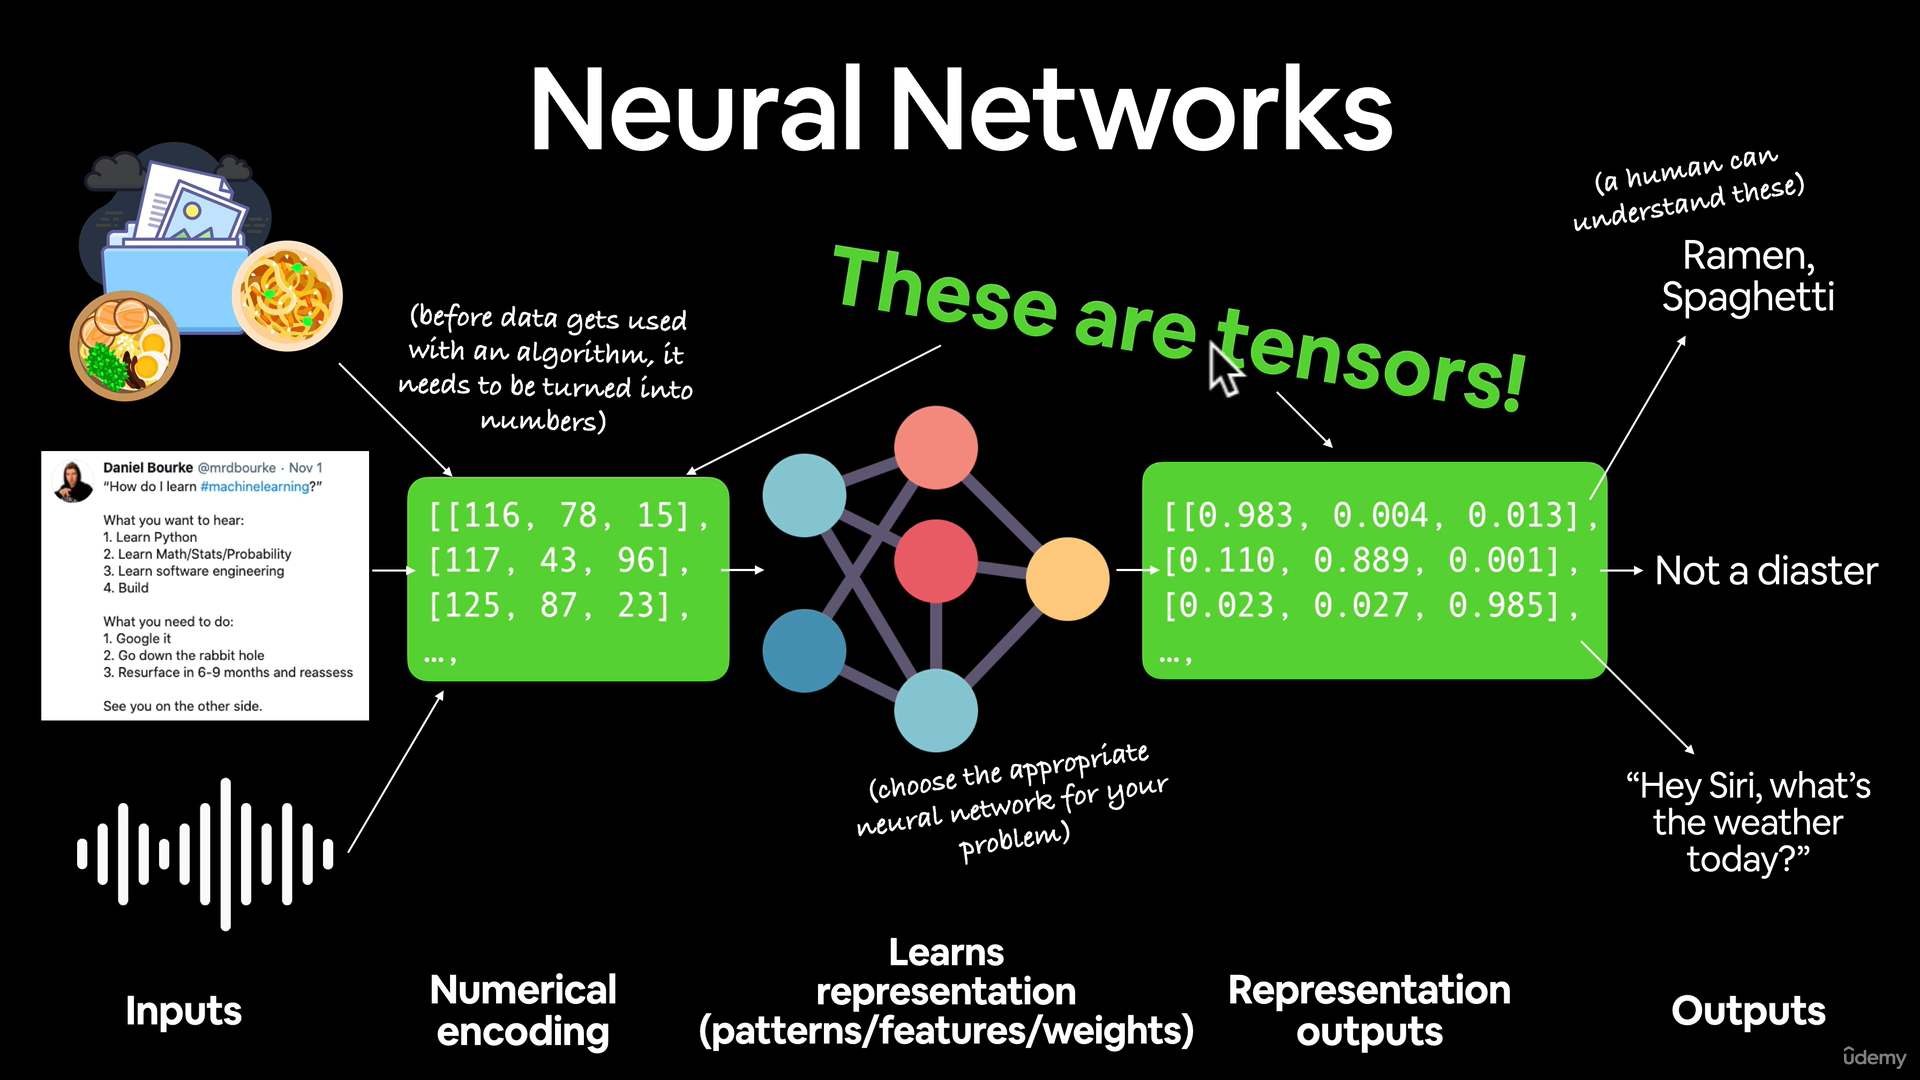

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


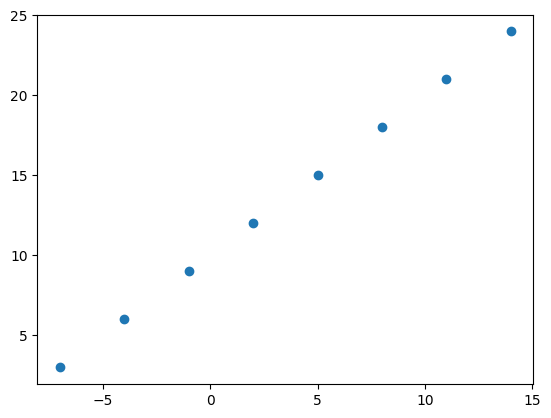

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [ ]:
y == x + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input & Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is ) and the optimizer ( Tells our model how to improve the patters its learning ) and evaluation metrics ( what we can use to interpret the performance of our model. )

3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels. )

In [ ]:
from tensorflow.keras.models import Sequential
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 489ms/step - loss: 8.6554 - mae: 8.6554
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5229 - mae: 8.5229
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3904 - mae: 8.3904
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2579 - mae: 8.2579
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1254 - mae: 8.1254
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9929 - mae: 7.9929
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8604 - mae: 7.8604
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7279 - mae: 7.7279
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5954 - mae: 7.5954
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4629 - mae: 7.4629
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - los

In [ ]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Convert the input to a TensorFlow tensor
input_tensor = tf.constant([17.0])


In [ ]:
# Predict using the model
y_pred = model.predict(tf.expand_dims(input_tensor, axis=1))
y_pred

1/1 [==============================] - 0s 75ms/step


array([[30.255697]], dtype=float32)

## Improving our model


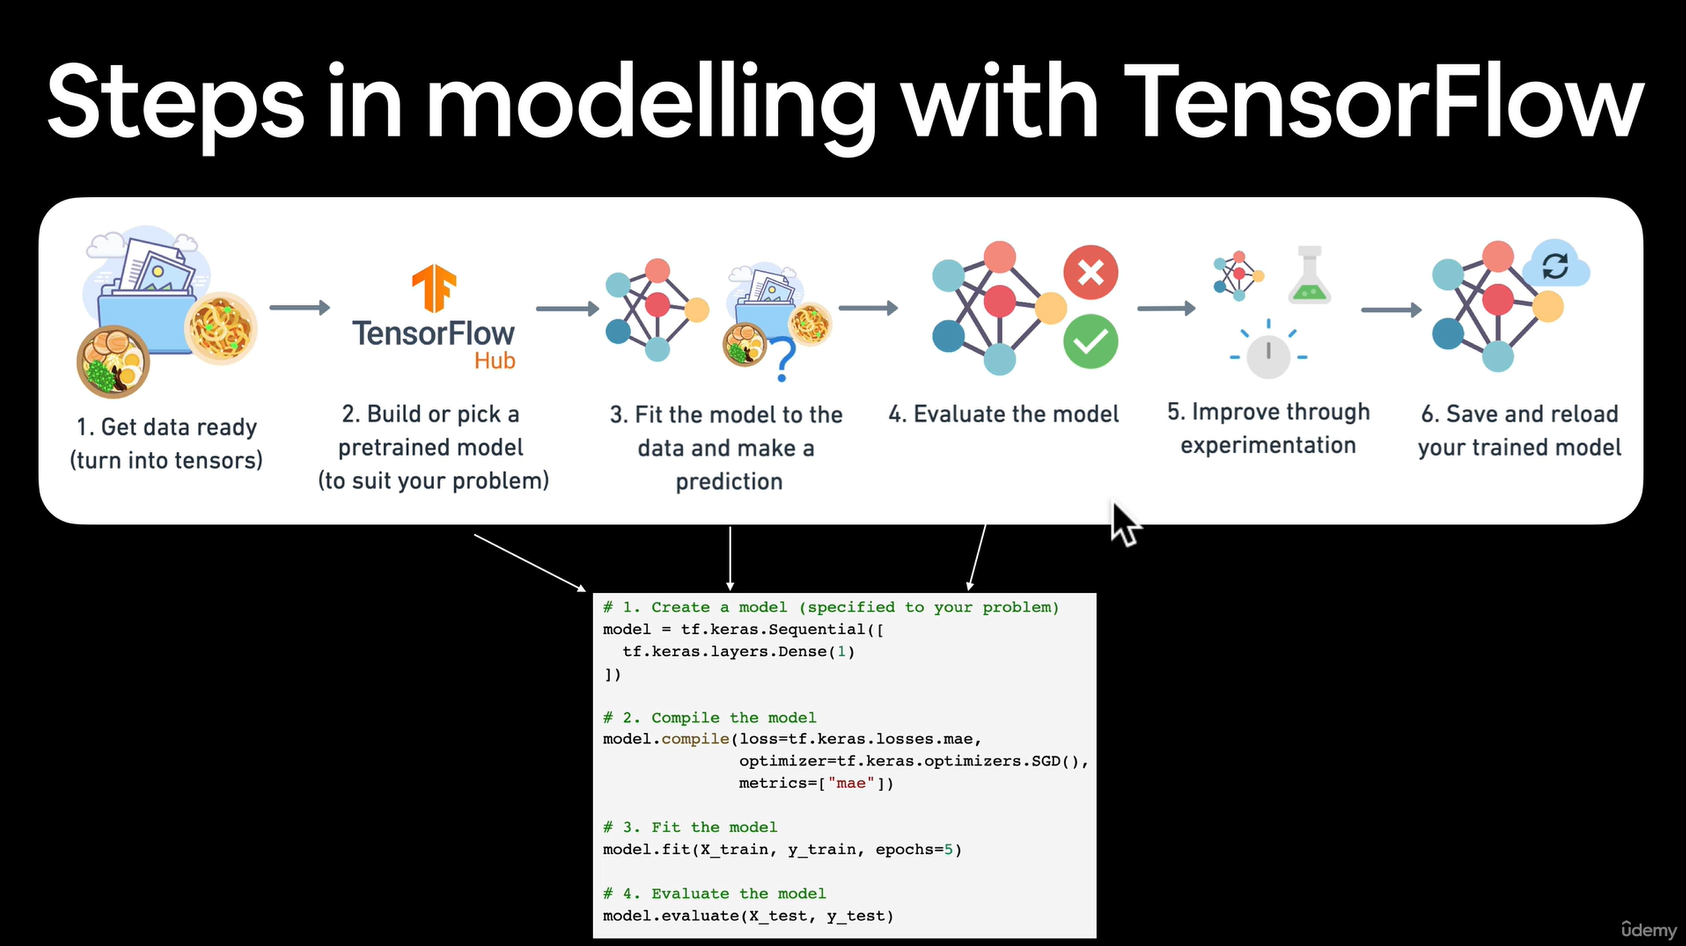

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units ( all called neurons ) within each of hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning Rate of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** ( Leave it training for longer ) or on more data ( give the model more examples to learn from ).



In [ ]:
from tensorflow.keras.models import Sequential
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=None),
    tf.keras.layers.Dense(1, name="input_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(x,axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 660ms/step - loss: 12.3215 - mae: 12.3215
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2921 - mae: 12.2921
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2626 - mae: 12.2626
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2332 - mae: 12.2332
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2037 - mae: 12.2037
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1742 - mae: 12.1742
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1446 - mae: 12.1446
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1151 - mae: 12.1151
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0855 - mae: 12.0855
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0559 - mae: 12.0559
Epoch 11/100
1/1 [==============================

In [ ]:
y_pred = model.predict(tf.expand_dims([17.0], axis=1))
y_pred

1/1 [==============================] - 0s 73ms/step


array([[19.175362]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->.....
```

When it comes to evaluation .....there are 3 words you should memorize:

> "Visualiz", "Visualize", "Visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

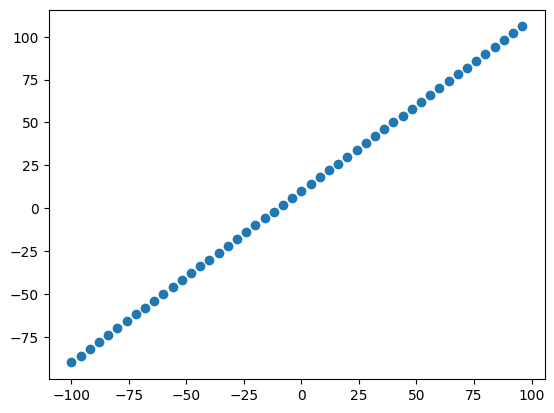

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets

* **Training set** - the model learn from data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% data is you have available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-20% of the total dat available.

In [ ]:
len(x)

50

In [ ]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training ssamples (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are test samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

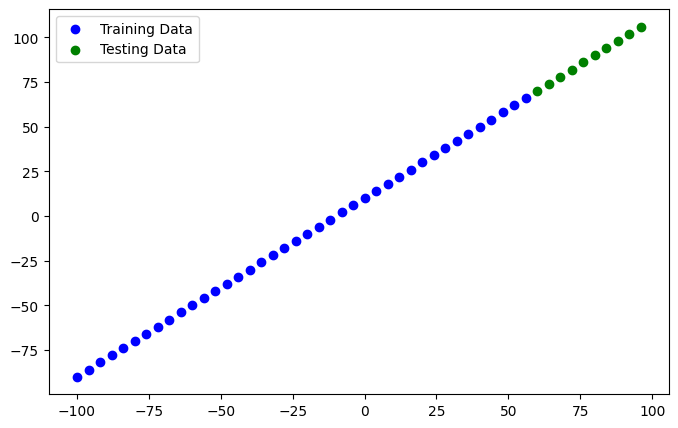

In [ ]:
plt.figure(figsize=(8, 5))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label= 'Training Data')
# plot testing data in green
plt.scatter(x_test, y_test, c='g', label='Testing Data')
# Show a legend
plt.legend()

In [ ]:
# Let's have a look out how to build a neural network for our data
from tensorflow.keras.models import Sequential

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              ),

# Fit the model
# model.fit(x_train, y_train, epochs=100)

(None,)

### Visualizing the model

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_Layer", activation='relu'),
    tf.keras.layers.Dense(1, name="Output_Layer")
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total Param** - total number of parameters in the model.
* **Trainable Parameter** - these are the parameters (patterns) the model can update as it trains
* **Non-Trainable Params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during `transfer learning`.)

In [ ]:
# Let's fit  our model to the training data
model.fit(x_train, y_train, epochs=50, verbose=0)

In [ ]:
# Get model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


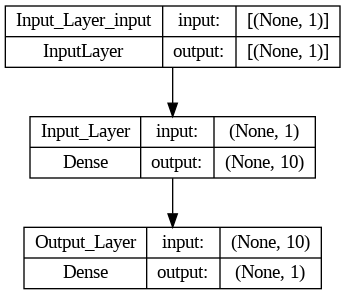

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea  to plot them against the ground truth labels.

offten you'll see this in the form of `y_test`, or  `y_true` versus `y_pred` ( ground truth versus the model's prediction ).

In [ ]:
# Make some predictions

y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[ 74.86443 ],
       [ 79.85068 ],
       [ 84.836914],
       [ 89.823166],
       [ 94.8094  ],
       [ 99.79564 ],
       [104.78188 ],
       [109.76813 ],
       [114.75437 ],
       [119.7406  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
x_train, x_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(8, 5))
  # Set title for the plot
  plt.title('Scatter Plot')
  # Plot train data in blue
  plt.scatter(train_data, train_labels, c="b", label="training data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  # plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  # show legend
  plt.legend();

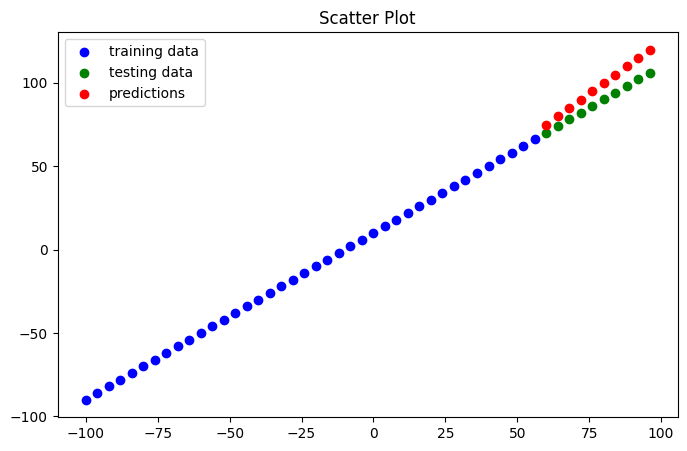

In [ ]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model predictions with regression evaluation metrics

Depending on the problem you've working on, there will be different evaluation metrics to evaluate your model's performance.

since we've working on a regression, two of the main metrics:
* **MAE** - Mean Absolute Error, "on average, how wrong is each of my model's predictions."
* **MSE** - Mean Square Error, "Square the average errors".

In [ ]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 142ms/step - loss: 9.3025 - mae: 9.3025


[9.302519798278809, 9.302519798278809]

In [ ]:
# Calculate the mean absolute error
MAE = tf.metrics.mean_absolute_error(y_pred = tf.squeeze(y_pred), y_true = tf.constant(y_test))
MAE

<tf.Tensor: shape=(), dtype=float32, numpy=9.302522>

In [ ]:
MSE = tf.metrics.mean_squared_error(y_pred = tf.squeeze(y_pred), y_true = y_test)
MSE

<tf.Tensor: shape=(), dtype=float32, numpy=94.56145>

In [ ]:
# Make some functions to reuse MAE or MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fir it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ....
```

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.


Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.


* **Build `model_1`**

In [ ]:
x_train_reshape = tf.reshape(x_train, (-1,1))
x_train_reshape

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [ ]:
from tensorflow.keras.models import Sequential

# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(x_train_reshape, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 87.9824 - mae: 87.9824
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 52.5270 - mae: 52.5270
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.9361 - mae: 16.9361
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1800 - mae: 9.1800
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0078 - mae: 11.0078
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1733 - mae: 10.1733
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1950 - mae: 9.1950
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1458 - mae: 9.1458
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 15.2204 - mae: 15.2204
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8566 - mae: 7.8566
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 46ms/step


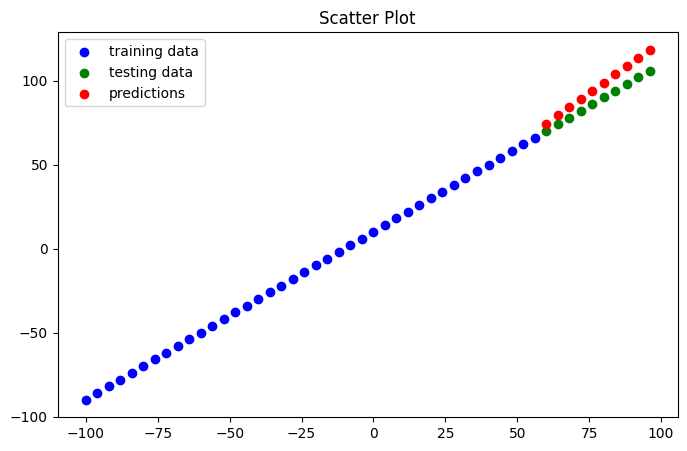

In [ ]:
y_pred_1 = model.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate the model 1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.432038>,
 <tf.Tensor: shape=(), dtype=float32, numpy=77.47935>)

* **Build `model_2`**
  * 2 Dense layers, trained for 100 epochs

In [ ]:
from tensorflow.keras.models import Sequential

# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_2.fit(x_train_reshape, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 31.3174 - mae: 31.3174
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.7042 - mae: 26.7042
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 30.4281 - mae: 30.4281
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 16.6898 - mae: 16.6898
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.9885 - mae: 22.9885
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7090 - mae: 10.7090
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7292 - mae: 11.7292
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.1308 - mae: 12.1308
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.0872 - mae: 38.0872
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6623 - mae: 25.6623
Epoch 11/100
2/2 [==============================] - 0s 12m

1/1 [==============================] - 0s 60ms/step


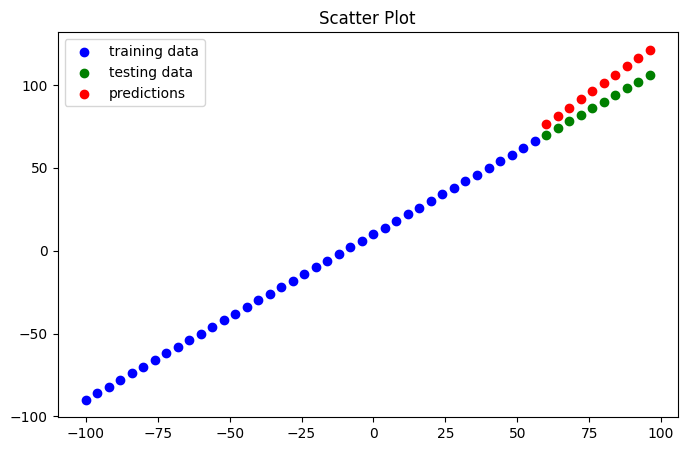

In [ ]:
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate the model 1 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.883276>,
 <tf.Tensor: shape=(), dtype=float32, numpy=126.38987>)

* **Build `model_3`**
  * 2 layers and trained for 500 epochs

In [ ]:
from tensorflow.keras.models import Sequential

# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_3.fit(x_train_reshape, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 44.7711 - mae: 44.7711
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 19.8703 - mae: 19.8703
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 25.5027 - mae: 25.5027
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 13.6183 - mae: 13.6183
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 8.4717 - mae: 8.4717
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 9.2821 - mae: 9.2821
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.7172 - mae: 10.7172
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0405 - mae: 12.0405
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 30.6836 - mae: 30.6836
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 18.6058 - mae: 18.6058
Epoch 11/500
2/2 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 94ms/step


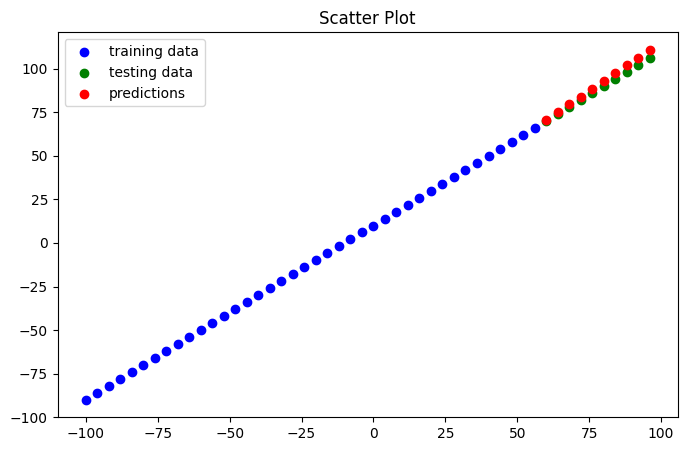

In [ ]:
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.7181916>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.222216>)

### Comparing the results of our experiments

We've run a few experiments, let's code compare the results

In [ ]:
mae_1_value = mae_1.numpy()
mse_1_value = mse_1.numpy()
mae_2_value = mae_2.numpy()
mse_2_value = mse_2.numpy()
mae_3_value = mae_3.numpy()
mse_3_value = mse_3.numpy()

In [ ]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd
import numpy as np


model_result = [["model_1", mae_1_value, mse_1_value],
                ["model_2", mae_2_value, mse_2_value],
                ["model_3", mae_3_value, mse_3_value]]

all_results = pd.DataFrame(model_result, columns=["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,8.432038,77.479347
1,model_2,10.883276,126.389870
2,model_3,2.718192,9.222216


**Looks Like the Model 1 Performed best..**

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Tracking your experiments**

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 Resource: But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving Our Model's

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

  1. The SavedModel format (default).
  2. The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

**Which one should you use?**

  It depends on your situation but the SavedModel format will suffice most of the time.

In [ ]:
# Save model using savemodel format
model.save("drive/MyDrive/Tensorflow Certification Course/best_model_savedmodel_format.keras")

In [ ]:
# Save model using HDF5 Format
model.save("drive/MyDrive/Tensorflow Certification Course/best_model_savedmodel_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Loading a save model**

We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
new_saved_model = tf.keras.models.load_model("drive/MyDrive/Tensorflow Certification Course/best_model_savedmodel_format.keras")
new_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_1_pred = model.predict(x_test)
saved_model = new_saved_model.predict(x_test)

mae(y_true=y_test, y_pred=model_1_pred) == mae(y_true=y_test, y_pred=saved_model)

1/1 [==============================] - 0s 47ms/step


<tf.Tensor: shape=(), dtype=bool, numpy=True>

# **A Larger Example**

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [ ]:
# Importing required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Let's try one hot encoding our DataFrame to convert it into Numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a neural network ( sort of like model_1 above )
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12957.8232 - mae: 12957.8232
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12112.9766 - mae: 12112.9766
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11285.5908 - mae: 11285.5908
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 10527.8926 - mae: 10527.8926
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9877.6172 - mae: 9877.6172
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9327.2285 - mae: 9327.2285
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8851.7178 - mae: 8851.7178
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8463.1504 - mae: 8463.1504
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 8156.3315 - mae: 8156.3315
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7909.3804 - mae: 7

In [ ]:
insurance_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7002.7280 - mae: 7002.7280


[7002.72802734375, 7002.72802734375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
# Try to improve our model

tf.random.set_seed(42)

# Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13301.9629 - mae: 13301.9629
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13139.7764 - mae: 13139.7764
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12805.2402 - mae: 12805.2402
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12144.4854 - mae: 12144.4854
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11028.9834 - mae: 11028.9834
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9574.5547 - mae: 9574.5547
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8218.2627 - mae: 8218.2627
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7544.1577 - mae: 7544.1577
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7428.7456 - mae: 7428.7456
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7407.0615 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4770.1230 - mae: 4770.1230


[4770.123046875, 4770.123046875]

In [ ]:
# Train for longer (200 epochs)

tf.random.set_seed(42)

# Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13302.3281 - mae: 13302.3281
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13157.3193 - mae: 13157.3193
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12842.0264 - mae: 12842.0264
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12203.9141 - mae: 12203.9141
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11113.2285 - mae: 11113.2285
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9674.2549 - mae: 9674.2549
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8304.2061 - mae: 8304.2061
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7580.9502 - mae: 7580.9502
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7443.3774 - mae: 7443.3774
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7421.5210 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.7175 - mae: 3495.7175


[3495.717529296875, 3495.717529296875]

Text(0.5, 0, 'epochs')

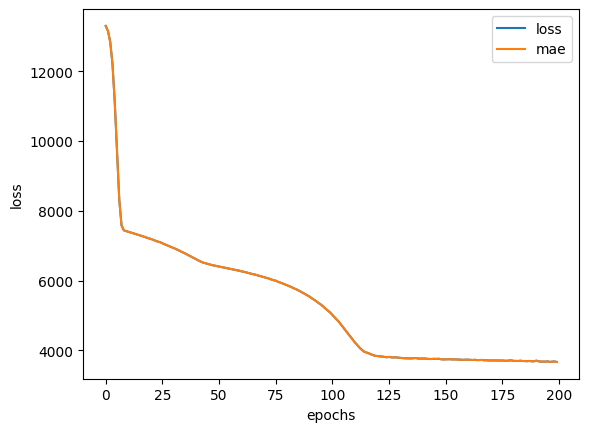

In [ ]:
# plot history ( Also known as a loss curve or training curve )

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 Question: How long should you train for?

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

# Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
  * Which one should you use?
    * With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from scikit learn

In [ ]:
!apt-get -qq install -y MinMaxScalar
!pip install scikit-learn


E: Unable to locate package MinMaxScalar


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # Scale specified columns using MinMaxScaler
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode specified columns
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on the training data
ct.fit(X_train)

# Transform training and test data using the fitted transformer
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like ?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
tf.random.set_seed(42)

# Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model

insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13344.3906 - mae: 13344.3906
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.9961 - mae: 13336.9961
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13317.8379 - mae: 13317.8379
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13275.8721 - mae: 13275.8721
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13199.4834 - mae: 13199.4834
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13077.5303 - mae: 13077.5303
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12899.7832 - mae: 12899.7832
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12656.1650 - mae: 12656.1650
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12336.4736 - mae: 12336.4736
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11935.80

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.2773 - mae: 3438.2773


[3438.27734375, 3438.27734375]

Text(0.5, 0, 'epochs')

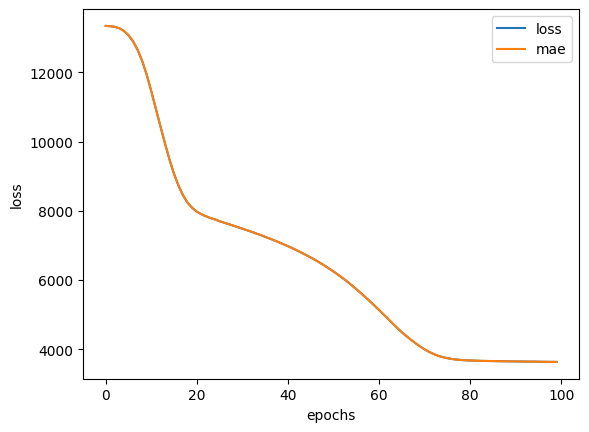

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **Exercise**

In [150]:
# Import required library
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [151]:
# The dropna() method is used to remove rows with missing values (NaNs) from the DataFrame.

housing_data = pd.read_csv("/content/drive/MyDrive/Tensorflow Certification Course/HousingData.csv")
housing_data.dropna(inplace=True)

In [152]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [191]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


X = housing_data.drop(columns=['MEDV'])
y = housing_data['MEDV']
cols = X.columns # The column names of the independent features are stored in the variable cols.

scaler = StandardScaler() # `StandardScaler()` is initialized to standardize the independent features.
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols) # The standardized features are stored back in DataFrame X, maintaining the original column names.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (315, 13)
y_train: (315,)
X_test: (79, 13)
y_test: (79,)


In [154]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
housing_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
housing_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = housing_model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 1s 4ms/step - loss: 22.3381 - mae: 22.3381
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 22.0479 - mae: 22.0479
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 21.7369 - mae: 21.7369
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 21.4086 - mae: 21.4086
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 20.9803 - mae: 20.9803
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 20.4356 - mae: 20.4356
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 19.7410 - mae: 19.7410
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 18.8289 - mae: 18.8289
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 17.6451 - mae: 17.6451
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 16.2045 - mae: 16.2045
Epoch 11/200
10/10 [===================

In [155]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [181]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
housing_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation = "sigmoid"),
    tf.keras.layers.Dense(1, activation = "linear")
])

# Compile the model
housing_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
history = housing_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 6ms/step - loss: 22.7327 - mae: 22.7327
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 22.2839 - mae: 22.2839
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 21.8351 - mae: 21.8351
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 21.3855 - mae: 21.3855
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 20.9346 - mae: 20.9346
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 20.4818 - mae: 20.4818
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 20.0264 - mae: 20.0264
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 19.5675 - mae: 19.5675
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 19.1044 - mae: 19.1044
Epoch 10/100
10/10 [==============================] - 0s 11ms/step - loss: 18.6365 - mae: 18.6365
Epoch 11/100
10/10 [==================

In [182]:
housing_model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 14)                196       
                                                                 
 dense_76 (Dense)            (None, 1)                 15        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
housing_model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               1400      
                                                                 
 dense_58 (Dense)            (None, 10)                1010      
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2421 (9.46 KB)
Trainable params: 2421 (9.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [205]:
y_preds = housing_model_1.predict(X_test).reshape(-1,)
y_preds

3/3 [==============================] - 0s 4ms/step


array([16.252077  , 29.710993  ,  7.082297  , 37.830353  , 33.46018   ,
       20.149057  , 22.450773  , 26.293474  , 25.750181  , 12.819147  ,
       18.88782   , 21.101702  , 23.550291  ,  8.832133  , 24.887245  ,
       26.601767  ,  5.880863  , 16.205133  , 28.136564  , 16.77867   ,
       19.367796  , 21.985334  , 21.032425  , 13.991038  ,  0.14985761,
       25.874048  , 34.170044  , 31.563728  , 22.893034  , 16.20516   ,
       18.113174  , 17.816116  , 14.783749  ,  1.4215661 , 30.592447  ,
       20.281525  , 17.705133  , 21.077927  , 44.03912   , 18.553316  ,
       15.585426  , 19.811644  , 21.85272   , 28.028646  ,  6.9931626 ,
       25.65053   , 33.76291   , 20.011549  , 31.973536  , 26.907482  ,
       34.898552  , 18.057678  , 20.513912  , 19.47151   , 33.189644  ,
        8.428462  , 22.28905   , 32.08883   , 11.706004  , 21.602873  ,
       17.907927  , 18.88315   , 18.753193  , 21.055067  , 20.96283   ,
       24.133257  , 16.95135   , 23.813051  , 26.151705  , 27.14

In [206]:
y_preds, y_test, len(y_preds), len(y_test)

(array([16.252077  , 29.710993  ,  7.082297  , 37.830353  , 33.46018   ,
        20.149057  , 22.450773  , 26.293474  , 25.750181  , 12.819147  ,
        18.88782   , 21.101702  , 23.550291  ,  8.832133  , 24.887245  ,
        26.601767  ,  5.880863  , 16.205133  , 28.136564  , 16.77867   ,
        19.367796  , 21.985334  , 21.032425  , 13.991038  ,  0.14985761,
        25.874048  , 34.170044  , 31.563728  , 22.893034  , 16.20516   ,
        18.113174  , 17.816116  , 14.783749  ,  1.4215661 , 30.592447  ,
        20.281525  , 17.705133  , 21.077927  , 44.03912   , 18.553316  ,
        15.585426  , 19.811644  , 21.85272   , 28.028646  ,  6.9931626 ,
        25.65053   , 33.76291   , 20.011549  , 31.973536  , 26.907482  ,
        34.898552  , 18.057678  , 20.513912  , 19.47151   , 33.189644  ,
         8.428462  , 22.28905   , 32.08883   , 11.706004  , 21.602873  ,
        17.907927  , 18.88315   , 18.753193  , 21.055067  , 20.96283   ,
        24.133257  , 16.95135   , 23.813051  , 26.1

In [207]:
# Create DataFrame from NumPy arrays
result = pd.DataFrame({
    'Actual': y_test.values,
    'Prediction': y_preds[:79]
})

result

,Actual,Prediction
0,17.2,16.252077
1,29.4,29.710993
2,8.5,7.082297
3,43.5,37.830353
4,32.4,33.460178
...,...,...
74,18.7,20.516567
75,22.7,19.101397
76,13.4,15.424782
77,24.4,27.272593


In [195]:
result['Resuidual'] = abs(result['Actual']-result['Prediction'])

In [196]:
result['Resuidual'].sum()/len(result)

2.866509591854071

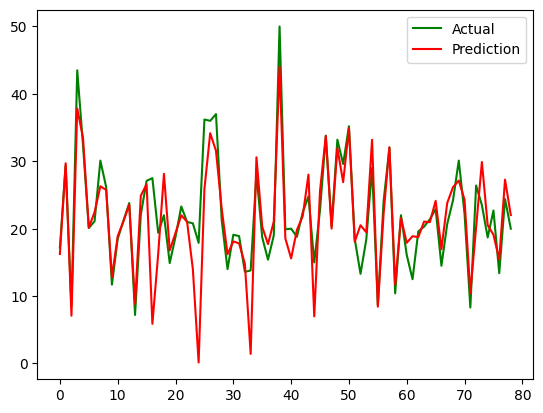

In [197]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='g', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.legend()
plt.show()